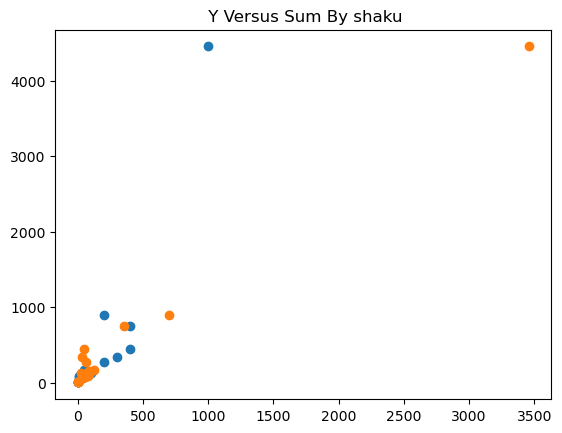

In [5]:
import pandas as pd
df = pd.read_csv("./add.csv")
df.head()

import matplotlib.pyplot as plt
plt.scatter(df["x"],df["sum"])
plt.title(" X Versus Sum By shaku")

import matplotlib.pyplot as plt
plt.scatter(df["y"],df["sum"])
plt.title(" Y Versus Sum By shaku")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["x", "y"]],df["sum"],test_size=0.2)
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})

import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
root.title("Add Two numbers using LR, BY shaku.")
root.geometry('800x400')

def predict_sum():
    try:
        x = float(entry_x.get())
        y = float(entry_y.get())
        input_df = pd.DataFrame({
            'x': [x],
            'y': [y]
        })
        sum_prediction = reg.predict(input_df)
        label_prediction.config(text=f"Predicted Sum: {sum_prediction[0]:.2f}")
    except ValueError:
        label_prediction.config(text="Please enter valid numbers.")

label_entry = tk.Label(root, text="Enter X and Y values:")
label_entry.pack(pady=10)
entry_x = tk.Entry(root, width=10)
entry_x.pack()
entry_y = tk.Entry(root, width=10)
entry_y.pack()
button_predict = tk.Button(root, text="Predict sum", command=predict_sum)
button_predict.pack(pady=10)
label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)

tk.mainloop()


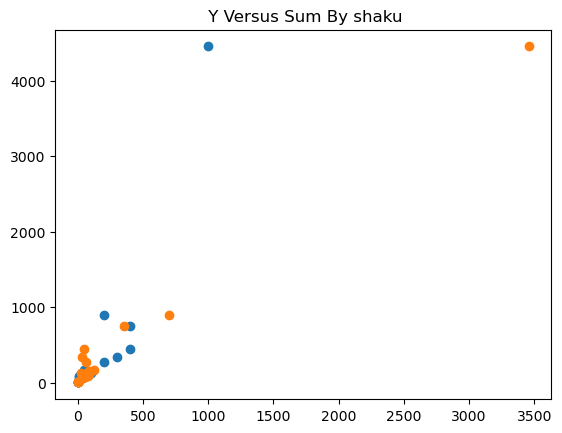

In [6]:
#POST-LAB Q1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('add.csv')

df.head()

import matplotlib.pyplot as plt
plt.scatter(df["x"],df["sum"])
plt.title(" X Versus Sum By shaku")

import matplotlib.pyplot as plt
plt.scatter(df["y"],df["sum"])
plt.title(" Y Versus Sum By shaku")

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
X_train, X_test, Y_train, Y_test = train_test_split(df[["x", "y"]],df["sum"],test_size=0.2)
class MyLinearRegression:
    def __init__(self):
        self.coef = None
        self.intercept = None
    
    def fit(self, X_train, y_train):
        # Add a column of ones for the intercept term
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        # β=(X^T * X)^-1* X^T*y
        self.coef = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        # Extract intercept and coefficients
        self.intercept = self.coef[0]
        self.coef = self.coef[1:]

    def predict(self, X_test):
        # Add a column of ones for the intercept term
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        # Predict using intercept and coefficients
        return X_test @ np.concatenate(([self.intercept], self.coef))

reg = MyLinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
score = r2_score(Y_test, Y_predict)

import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
root.title("Add Two numbers using LR, BY shaku.")
root.geometry('800x400')

def predict_sum():
    try:
        x = float(entry_x.get())
        y = float(entry_y.get())
        input_df = pd.DataFrame({
            'x': [x],
            'y': [y]
        })
        sum_prediction = reg.predict(input_df)
        label_prediction.config(text=f"Predicted Sum: {sum_prediction[0]:.2f}")
    except ValueError:
        label_prediction.config(text="Please enter valid numbers.")

label_entry = tk.Label(root, text="Enter X and Y values:")
label_entry.pack(pady=10)
entry_x = tk.Entry(root, width=10)
entry_x.pack()
entry_y = tk.Entry(root, width=10)
entry_y.pack()
button_predict = tk.Button(root, text="Predict sum", command=predict_sum)
button_predict.pack(pady=10)
label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)

tk.mainloop()
